# IFAM FISH SALES ANALYSIS AND SALES PREDICTION

In [ ]:
#we first load our dataset
import pandas as pd
d=pd.read_csv('Downloads\ifarm_data.csv')

df=d


In [4]:
#we then view the dataset in order to view the data so that we can decide which factors we are going to consider
#This also helps us to clean our data and make some considerable changes
df.head()

,Unnamed: 0,PRODUCT/SERVICE,MEMO/DESCRIPTION,QTY,SALES PRICE,AMOUNT,BALANCE,FISH SIZE,MONTH,DATE,Date
0,2,Fish:Fish size 2,50 pcs,50,100,"5,000.00","5,000.00",2,1,6,6/1/2021
1,3,Fish:Fish size 3,NaN,20,135,"2,700.00","7,700.00",3,1,7,7/1/2021
2,4,Fish:Fish size 2,NaN,8,100,800,"8,500.00",2,1,8,8/1/2021
3,5,Fish:Fish size 2,NaN,4,100,400,"8,900.00",2,1,8,8/1/2021
4,6,Fish:Fish size 4,NaN,2,220,440,"9,340.00",4,1,11,11/1/2021


In [6]:
#From our dataset above we don't have sales column which is our main goal so we have to add it
df2=df.copy()
df2['SALES']=df2['QTY']*df2['SALES PRICE']

In [7]:
#we can then view if our dataset has missing values,In this we can see that memo/description has null but we will drop it since 
#it is a factor that has a small effect to our dataset especially during predictions
df2.isnull().sum()

Unnamed: 0           0
PRODUCT/SERVICE      0
MEMO/DESCRIPTION    58
QTY                  0
SALES PRICE          0
AMOUNT               0
BALANCE              0
FISH SIZE            0
MONTH                0
DATE                 0
Date                 0
SALES                0
dtype: int64

In [76]:
#we then set our time/date to a date time series that can be used in our model predictions
df2['ORDER DATE']=pd.to_datetime(df2['Date'])
df2.head()
df2.drop(['Unnamed: 0','MEMO/DESCRIPTION'],axis=1)

,PRODUCT/SERVICE,QTY,SALES PRICE,AMOUNT,BALANCE,FISH SIZE,MONTH,DATE,Date,SALES,ORDER DATE,Month,Day,ds,y
0,Fish:Fish size 2,50,100,"5,000.00","5,000.00",2,1,6,6/1/2021,5000,2021-06-01,1,1970-01-01,2021-06-01,5000
1,Fish:Fish size 3,20,135,"2,700.00","7,700.00",3,1,7,7/1/2021,2700,2021-07-01,1,1970-01-01,2021-07-01,2700
2,Fish:Fish size 2,8,100,800,"8,500.00",2,1,8,8/1/2021,800,2021-08-01,1,1970-01-01,2021-08-01,800
3,Fish:Fish size 2,4,100,400,"8,900.00",2,1,8,8/1/2021,400,2021-08-01,1,1970-01-01,2021-08-01,400
4,Fish:Fish size 4,2,220,440,"9,340.00",4,1,11,11/1/2021,440,2021-11-01,1,1970-01-01,2021-11-01,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Fish:Fish size 2,8,100,800,"193,270.00",2,2,3,3/2/2021,800,2021-03-02,1,1970-01-01,2021-03-02,800
62,Fish:Fish size 2,4,100,400,"193,670.00",2,2,3,3/2/2021,400,2021-03-02,1,1970-01-01,2021-03-02,400
63,Fish:Fish size 3,3,135,405,"194,075.00",3,2,3,3/2/2021,405,2021-03-02,1,1970-01-01,2021-03-02,405
64,Fish:Fish size 3,3,135,405,"194,480.00",3,2,3,3/2/2021,405,2021-03-02,1,1970-01-01,2021-03-02,405


In [9]:
#To look at our dataframe componentsie if null and the type of the columns:int64 if numbers and object if not integer
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        66 non-null     int64         
 1   PRODUCT/SERVICE   66 non-null     object        
 2   MEMO/DESCRIPTION  8 non-null      object        
 3   QTY               66 non-null     int64         
 4   SALES PRICE       66 non-null     int64         
 5   AMOUNT            66 non-null     object        
 6   BALANCE           66 non-null     object        
 7   FISH SIZE         66 non-null     int64         
 8   MONTH             66 non-null     int64         
 9   DATE              66 non-null     int64         
 10  Date              66 non-null     object        
 11  SALES             66 non-null     int64         
 12  ORDER DATE        66 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 6.8+ KB


In [112]:
#we the add the moth and date column which can be used in analysis like showing daily,monthly,yearlyand weekly trends
df2['Month']=pd.DatetimeIndex(df2['MONTH']).month
df2['Day']=pd.DatetimeIndex(df2['DATE']).date
df2['Weekday']=pd.DatetimeIndex(df2['ORDER DATE']).weekday

In [113]:
#we can then rename our dtaframe from df2 to df3
df3=df2
df3.head()

,Unnamed: 0,PRODUCT/SERVICE,MEMO/DESCRIPTION,QTY,SALES PRICE,AMOUNT,BALANCE,FISH SIZE,MONTH,DATE,Date,SALES,ORDER DATE,Month,Day,ds,y,Week,Weekday
0,2,Fish:Fish size 2,50 pcs,50,100,"5,000.00","5,000.00",2,1,6,6/1/2021,5000,2021-06-01,1,1970-01-01,2021-06-01,5000,22,1
1,3,Fish:Fish size 3,NaN,20,135,"2,700.00","7,700.00",3,1,7,7/1/2021,2700,2021-07-01,1,1970-01-01,2021-07-01,2700,26,3
2,4,Fish:Fish size 2,NaN,8,100,800,"8,500.00",2,1,8,8/1/2021,800,2021-08-01,1,1970-01-01,2021-08-01,800,30,6
3,5,Fish:Fish size 2,NaN,4,100,400,"8,900.00",2,1,8,8/1/2021,400,2021-08-01,1,1970-01-01,2021-08-01,400,30,6
4,6,Fish:Fish size 4,NaN,2,220,440,"9,340.00",4,1,11,11/1/2021,440,2021-11-01,1,1970-01-01,2021-11-01,440,44,0


In [114]:
#we can then look at the dataframe statiscall descriptions

In [115]:
df3.describe()

,Unnamed: 0,QTY,SALES PRICE,FISH SIZE,MONTH,DATE,SALES,Month,y,Week,Weekday
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0,66.000000,66.000000,66.000000
mean,16.984848,17.015152,155.378788,3.090909,1.196970,16.984848,2991.666667,1.0,2991.666667,17.848485,2.469697
std,9.621278,38.729632,57.761516,0.956392,0.400757,10.706565,8187.747193,0.0,8187.747193,19.233978,2.543285
min,0.000000,1.000000,90.000000,2.000000,1.000000,1.000000,270.000000,1.0,270.000000,3.000000,0.000000
25%,9.000000,4.000000,100.000000,2.000000,1.000000,8.750000,440.000000,1.0,440.000000,4.000000,0.000000
50%,17.000000,8.000000,135.000000,3.000000,1.000000,18.500000,860.000000,1.0,860.000000,4.000000,1.000000
75%,25.000000,12.000000,217.500000,4.000000,1.000000,25.000000,1958.750000,1.0,1958.750000,44.000000,5.000000
max,33.000000,297.000000,270.000000,5.000000,2.000000,31.000000,62370.000000,1.0,62370.000000,53.000000,6.000000


In [116]:
#From the above descriptive statistics we can conclude that:
#mean sales=2991.66667
#mean quantity sold=17.015152
#mean sales price=155.378788
#max sales=62370
#standard deviation(std) for the sales=8187.747193

In [117]:
#we can look at the maximum sales from the code below
df3.SALES.max()


62370

In [118]:
#we can also look at the minimum sales from the code below
df3.SALES.min()

270

In [119]:
#We can look at the total sum of the sales
df3.SALES.sum()

197450

# STATISTICS


 From the above  we statistics we can deduce that:
        Mean of the sales=155.378
        Mean of quantity sold is=17.015
        standard deviation for sales=57.76
        standard deviation for the quantity sold=38.7296
        The average fish_size sold=3.090909
 Lets do more on the statistics       

# WHICH TYPE OF FISH WAS SOLD THE MOST AND BY HOW MUCH

In [120]:
#we start our analysis by importing the necesary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


In [121]:
#we then group our sales while considering fish size as our main factor of analysis
#This forms a dataframe/table but we should consider only the columns that make sense.eg the sales and qty columns
results=df3.groupby('FISH SIZE').sum('SALES')
results

,Unnamed: 0,QTY,SALES PRICE,MONTH,DATE,SALES,Month,y,Week,Weekday
FISH SIZE,,,,,,,,,,
2,327,216,2170,25,307,21420,21,21420,458,50
3,458,268,3355,32,362,37310,24,37310,392,52
4,235,594,3150,16,324,126750,15,126750,226,41
5,101,45,1580,6,128,11970,6,11970,102,20


In [122]:
Fish_size=np.arange(len(df3['FISH SIZE']))
Fish_size=range(2,6)


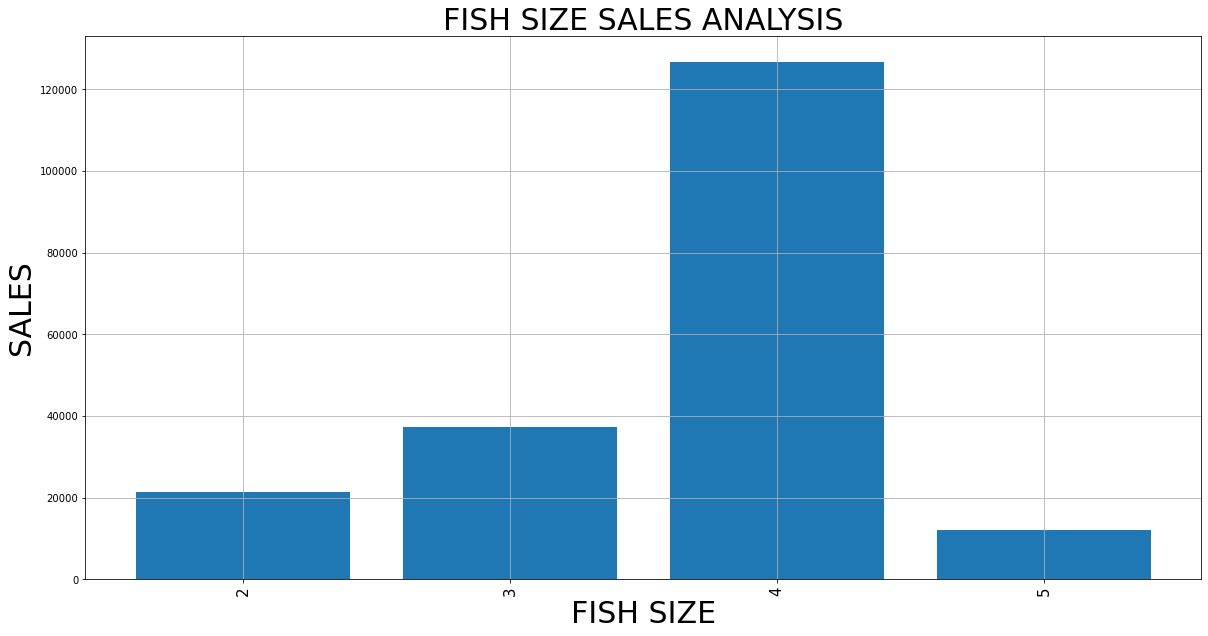

In [123]:
#we can the visualise our dataset

plt.bar(Fish_size,results['SALES'])
plt.title('FISH SIZE SALES ANALYSIS',size=30)
plt.xlabel('FISH SIZE',size=30)
plt.ylabel('SALES',size=30)
plt.xticks(Fish_size,rotation=('vertical'),size=15)
plt.grid()

In [124]:
#From the above plot we can conclude that:
#Fish size 5 is sold the list
#Fish size 4 is the least sold
#Fish size 3 is averagely sold

#The above statistics may be as a result of different factors eg promotion,price,test or even just the size of the fish


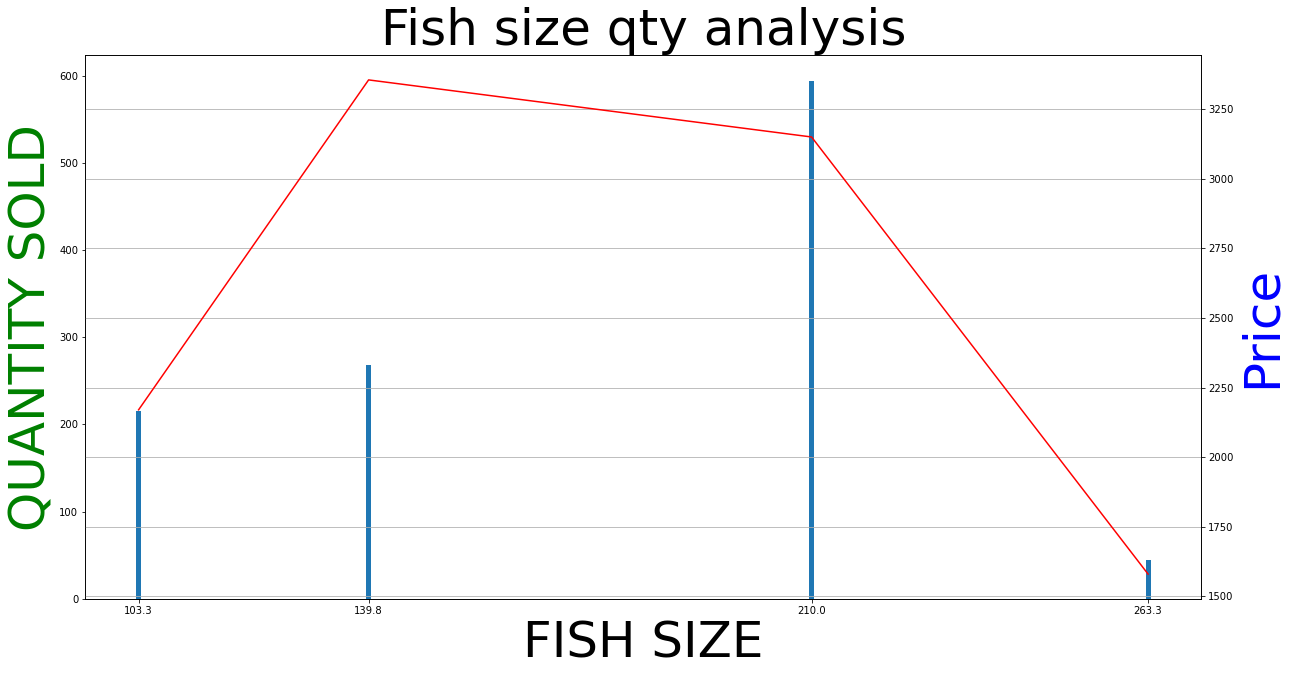

In [125]:
#Let's look how the price affects the fish size

matplotlib.rcParams['figure.figsize']=(20,10)
Fish_size=df2.groupby('FISH SIZE')['SALES PRICE'].mean()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(Fish_size,results.QTY)
ax2.plot(Fish_size,results['SALES PRICE'],color='r')
ax1.set_xlabel('FISH SIZE',size=50)
ax1.set_ylabel('QUANTITY SOLD',color='g',size=50)
ax2.set_ylabel('Price',color='b',size=50)
plt.title('Fish size qty analysis',size=50)
plt.xticks(Fish_size,size=20,rotation='vertical')
plt.grid()
plt.show()

# QUANTITY SOLD

In [126]:
df3.groupby('FISH SIZE').sum('QTY')

,Unnamed: 0,QTY,SALES PRICE,MONTH,DATE,SALES,Month,y,Week,Weekday
FISH SIZE,,,,,,,,,,
2,327,216,2170,25,307,21420,21,21420,458,50
3,458,268,3355,32,362,37310,24,37310,392,52
4,235,594,3150,16,324,126750,15,126750,226,41
5,101,45,1580,6,128,11970,6,11970,102,20


<function matplotlib.pyplot.show(close=None, block=None)>

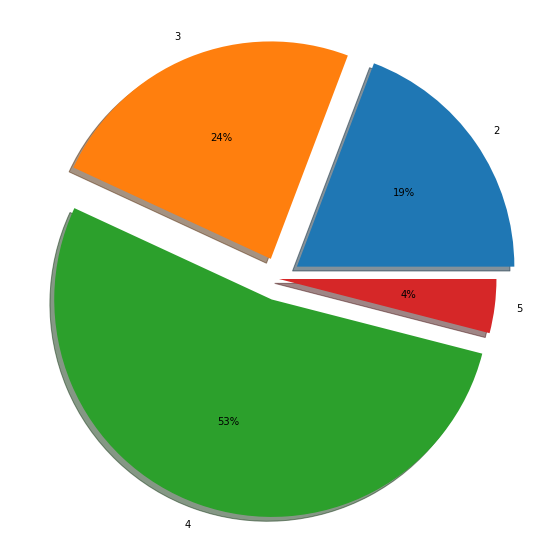

In [127]:
#Let's look at the fish size quantity sales analysis

Fish_size=range(2,6)
plt.pie(results['QTY'],labels=Fish_size,radius=1,autopct='%0.0f%%',shadow=True,explode=[0.1,0.1,0.1,0.])
plt.show

In [128]:
#we can conclude from the above chart that:
#Fish size 4 quantity sold is 53%
#Fish size 5 quantity sold is 5%
#Fish size 2 quantity sold is 19%
#Fish size 3 quantity sold is 24%

#we can see that in this case the fish size 4 still leads and fish size 5 is the list
#we can conclude that quantity sold is positively correlated with the sales

# Let's look at the timely sales analysis

Text(0.5, 1.0, 'TOTAL SALES PER DAY')

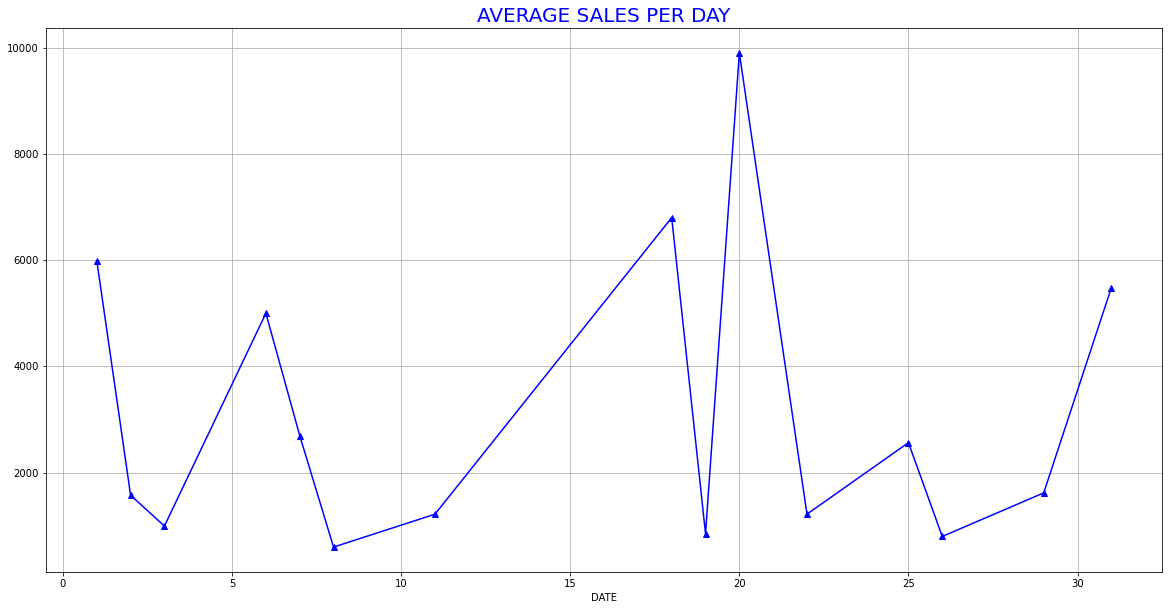

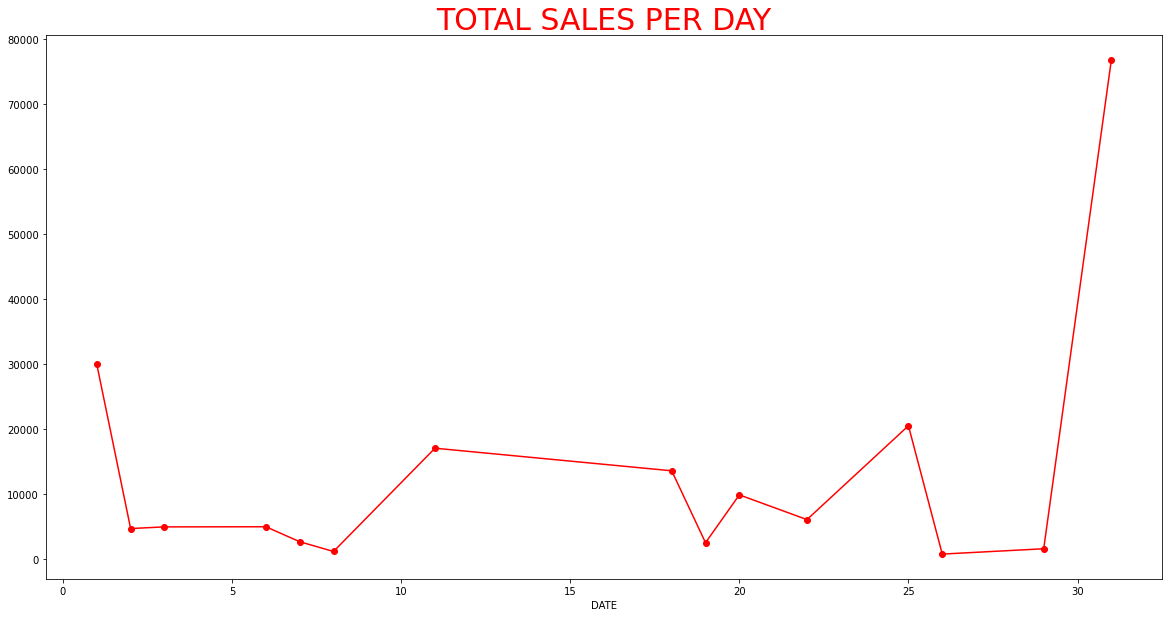

In [129]:
#Daily sales analysis

axis=df2.groupby('DATE')['SALES'].mean().plot(figsize=(20,10),color='b',marker='^')
axis.set_title('AVERAGE SALES PER DAY',size=20,color='b')
plt.grid()
plt.figure()

ax=df2.groupby('DATE').sum()['SALES'].plot(figsize=(20,10),color='r',marker='o')
ax.set_title('TOTAL SALES PER DAY',size=30,color='r')

In [130]:
#From the above daily sales plot we can conclude that:
#Sales trend increases steadily as we come to the close of the month
#Day 20 has the highest average sales although the the total sales on that day are low:
#this results in day 20 may be due to less/np promotions or high prices

#


# Let's look at the quantity sales nalysis

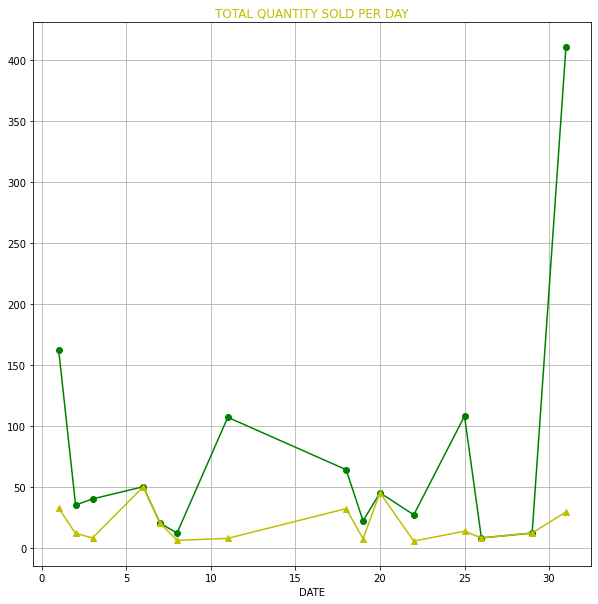

In [134]:
#Let's plot green colour for the sum of the quantity sold
#Yellow colour for the average quantity sold
axis=df2.groupby('DATE')['QTY'].sum().plot(figsize=(20,10),marker='o',color='g')
axis.set_title('AVERAGE QUANTITY SOLD PER DAY',color='g',size=20)
plt.grid()

axis=df2.groupby('DATE')['QTY'].mean().plot(figsize=(10,10),color='y',marker='^')
axis.set_title('TOTAL QUANTITY SOLD PER DAY',color='y')
plt.grid()

In [142]:
#From the above chat we can conclude that:
#The mean quantity sold are actually made on day 6
#The quantity of the sales sold increases as we edge toward the end of the month

# Let's look at the weekly trend

<Figure size 1440x720 with 0 Axes>

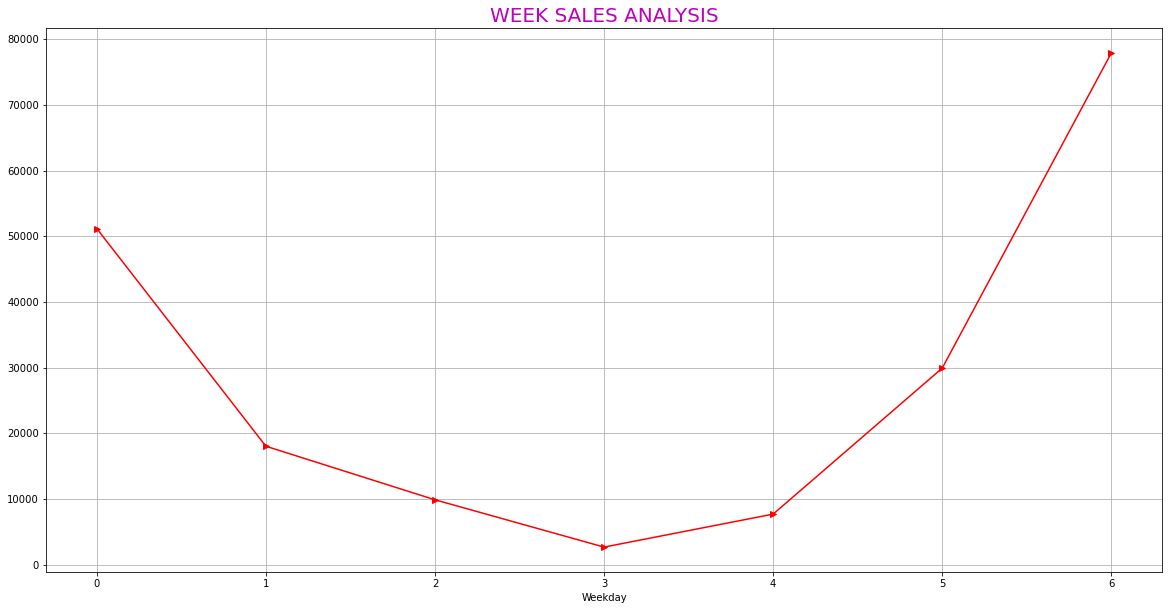

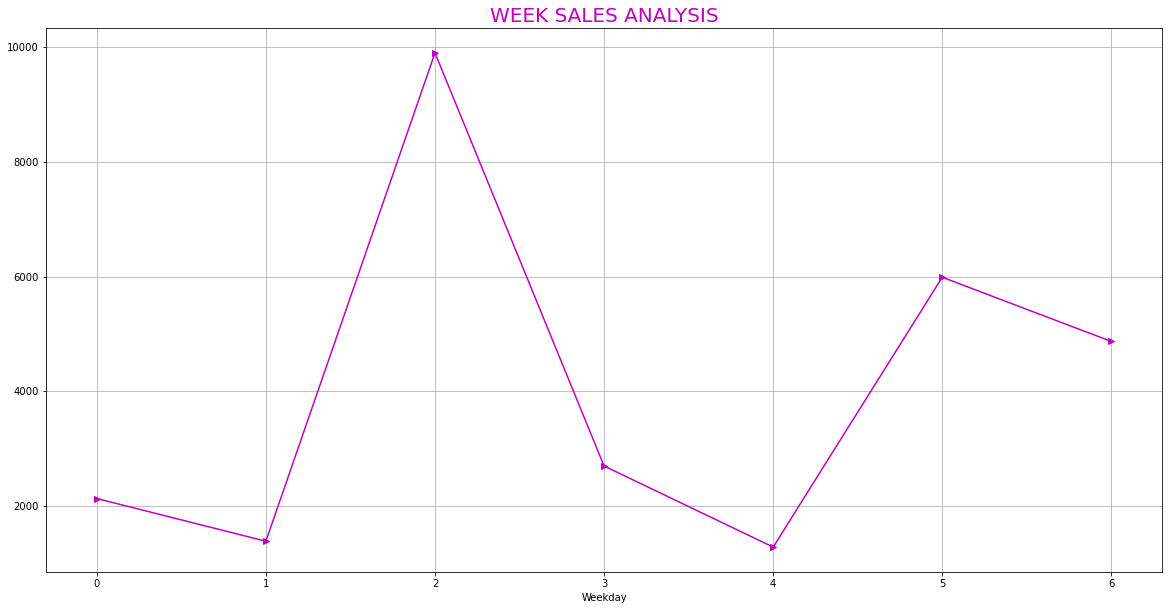

<Figure size 1440x720 with 0 Axes>

In [135]:
#We gruop the sales by considering the week as the main factor
#We plot the sum of sales as maroon colour
#We plot the average sales as red colour
axis=df2.groupby('Weekday').sum()['SALES'].plot(figsize=(20,10),marker='>',color='r')
axis.set_title('WEEK SALES ANALYSIS',size=20,color='m')
plt.grid()
plt.figure()

axis=df2.groupby('Weekday').mean()['SALES'].plot(figsize=(20,10),marker='>',color='m')
axis.set_title('WEEK SALES ANALYSIS',size=20,color='m')
plt.grid()
plt.figure()

In [ ]:
#Fro the above plot we can conclude that:
#The highest mean sales are on wednesday
#The lowest mean sales are on friday
#The hihgest sale are made on sunday

#The lowest sale are made on thusday

# Let's lok at the monthly sales analysis

In [44]:
#We group the sales by month
x=df2.groupby('MONTH').sum('SALES').drop('Month',axis=1)
x

,Unnamed: 0,QTY,SALES PRICE,FISH SIZE,DATE,SALES
MONTH,,,,,,
1,770,886,8555,168,1095,157795
2,351,237,1700,36,26,39655


In [45]:

Month=range(1,3)

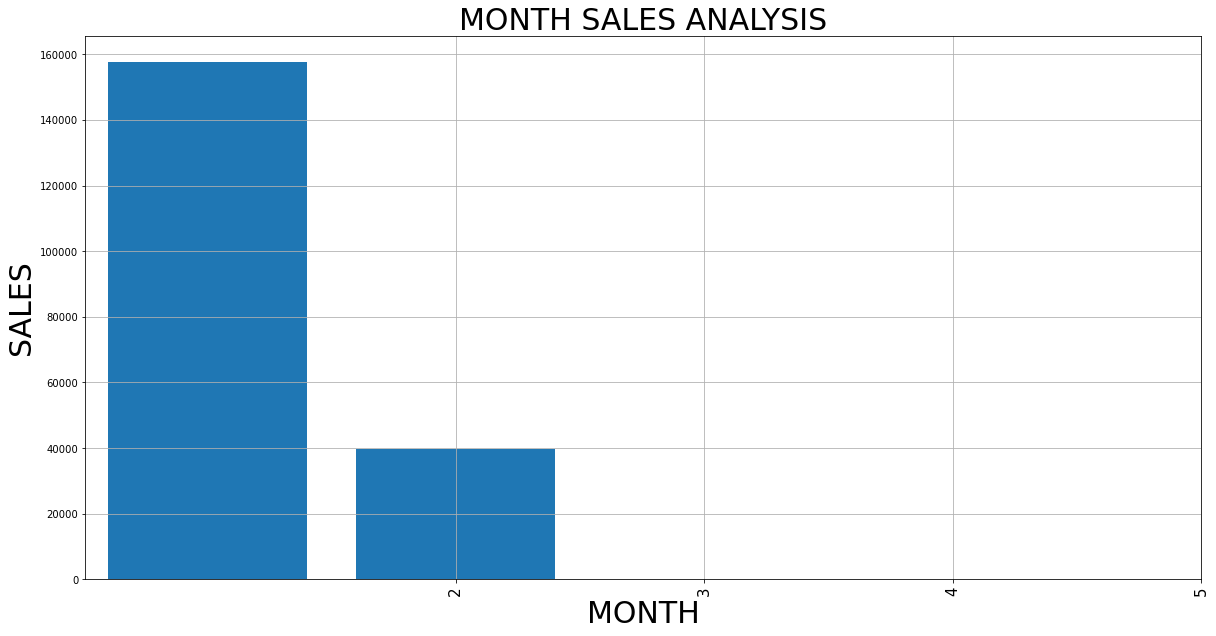

In [46]:
plt.bar(Month,x['SALES'])
plt.title('MONTH SALES ANALYSIS',size=30)
plt.xlabel('MONTH',size=30)
plt.ylabel('SALES',size=30)
plt.xticks(Fish_size,rotation=('vertical'),size=15)
plt.grid()

In [ ]:
#From the above bar graph we can be able to conclude that;
#The first month recorded a total sales of about ksh158,000

# Let's look at correlations

<AxesSubplot:>

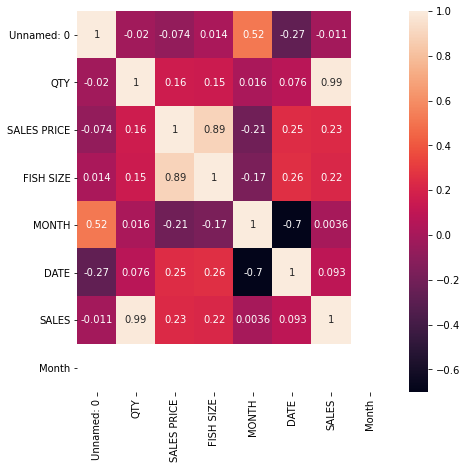

In [51]:
#In order for as to build a model we have to look at the correlations between different factors involved in model building
#Correlations can also show as the effect of promotions to our sales
#The promotions conducted can either affect our sales positive(positively correlated)or negative(negatively correlated)
#To obtain this correlations you can either read on the heatmap or the correlations table below


correlations=df3.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(correlations,annot=True)

In [136]:
#The correlations table
correlations

,Unnamed: 0,QTY,SALES PRICE,FISH SIZE,MONTH,DATE,SALES,Month
Unnamed: 0,1.000000,-0.020023,-0.074457,0.013527,0.519486,-0.272714,-0.010804,NaN
QTY,-0.020023,1.000000,0.157895,0.151978,0.015664,0.076133,0.991421,NaN
SALES PRICE,-0.074457,0.157895,1.000000,0.893325,-0.212625,0.249401,0.234174,NaN
FISH SIZE,0.013527,0.151978,0.893325,1.000000,-0.167855,0.257056,0.218705,NaN
MONTH,0.519486,0.015664,-0.212625,-0.167855,1.000000,-0.698476,0.003579,NaN
DATE,-0.272714,0.076133,0.249401,0.257056,-0.698476,1.000000,0.093359,NaN
SALES,-0.010804,0.991421,0.234174,0.218705,0.003579,0.093359,1.000000,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# CORRELATION
#From the above correlatin table we can be able to find the correlatin between the different variables and the correlation
#coefficient
#The correlation is read by the use of the colours or the correlation value ie the lighter the clour the higher the correlation
#or the higher the value the higher the correlaton.
#From the a bove we can deduce the following positive correlations:
    #positive correlation between sales and quantity sold with a correlation value of 0.99 or 99%
    #positive correlation between sales price and the type of fish sold with correlation value of 0.89 or 89%
    #positive correlatiom between the fish size and the sales price with correlation value of 0.89 
    #The darker colour represent less correlation.
    

# MODEL TRAINING

In [63]:
#Let's build our model
#we first load libraries

from fbprophet import Prophet

In [67]:

df2[['ds','y']]=df2[['ORDER DATE','SALES']]

In [68]:
model=Prophet()

In [69]:
model.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
#Since our model mainly considers time series as the main factor we provide our model with a period of 30 days for it to predict
future=model.make_future_dataframe(30)

In [71]:
forecast=model.predict(future)

In [140]:
#Our traines model has already given us our predictions and trends according to our data
#For us we are interestes about the future which are the yhat column in the table below
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-02,4682.975829,-4592.903049,15935.931560,4682.975829,4682.975829,1307.195087,1307.195087,1307.195087,1307.195087,1307.195087,1307.195087,0.0,0.0,0.0,5990.170916
1,2021-01-18,4539.735639,-6428.232021,14156.949758,4539.735639,4539.735639,-886.650395,-886.650395,-886.650395,-886.650395,-886.650395,-886.650395,0.0,0.0,0.0,3653.085244
2,2021-01-19,4530.783128,-8124.456469,11850.259649,4530.783128,4530.783128,-2872.378477,-2872.378477,-2872.378477,-2872.378477,-2872.378477,-2872.378477,0.0,0.0,0.0,1658.404650
3,2021-01-20,4521.830616,-350.000801,19052.289224,4521.830616,4521.830616,5378.483929,5378.483929,5378.483929,5378.483929,5378.483929,5378.483929,0.0,0.0,0.0,9900.314544
4,2021-01-22,4503.925592,-8689.245218,10755.351426,4503.925592,4503.925592,-3207.426635,-3207.426635,-3207.426635,-3207.426635,-3207.426635,-3207.426635,0.0,0.0,0.0,1296.498957


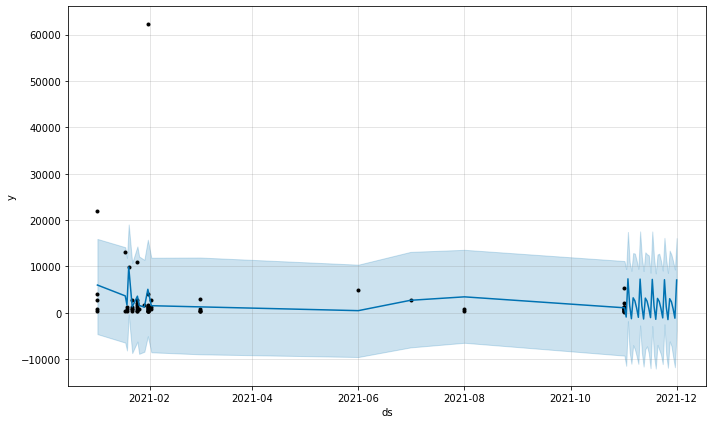

In [73]:
#From the above table its not easy to view the predictions
#We then have to plot to make it easy as from the saying a picture is worth than athousand words
model.plot(forecast)
plt.show()

In [ ]:
#From the above trend we can conclude that:
#The sales in the future are to increase and decrease according to time with a given constant values unless promotions are introduced


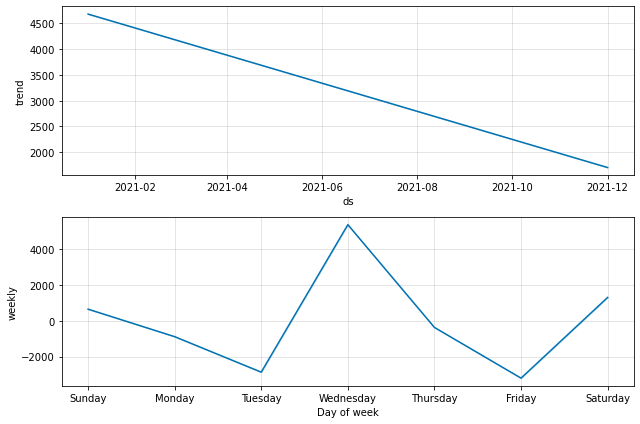

In [74]:
model.plot_components(forecast)
plt.show()

In [141]:
#From the above we can conclude that
#The trend actually is a nagative slope that affects sales negatively
##The mean sales in the future will remain on wednesdays according to the model and according to our analysis